In [1]:
using Random
using Distributions
# using Pkg
# Pkg.add("GaussianProcesses")
using GaussianProcesses
# This function creates a proposal where each element has its own mean and std dev.


In [2]:
Random.seed!(20140430)
# Training data
n=10;                          #number of training points
x = 2π * rand(n);              #predictors
y = sin.(x) + 0.05*randn(n);   #regressors

In [3]:
#Select mean and covariance function
mZero = MeanZero()                   #Zero mean function
kern = SE(0.0,0.0)                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

logObsNoise = -1.0                        # log standard deviation of observation noise (this is optional)
gp = GP(x,y,mZero,kern,logObsNoise)       #Fit the GP

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[2.3008941978115995 4.177929157381414 … 2.015277043100713 4.730977535989725]
  Output observations = [0.7710763105152831, -0.8391332919835048, -0.10379941216625867, 0.8742717770868422, -0.5504286710256119, -0.6641636221208442, -0.3429297010103842, 0.6259817552095643, 0.9198567208087357, -0.883006046800485]
  Variance of observation noise = 0.1353352832366127
  Marginal Log-Likelihood = -6.681

In [4]:
μ, σ² = predict_y(gp,range(0,stop=2π,length=100));

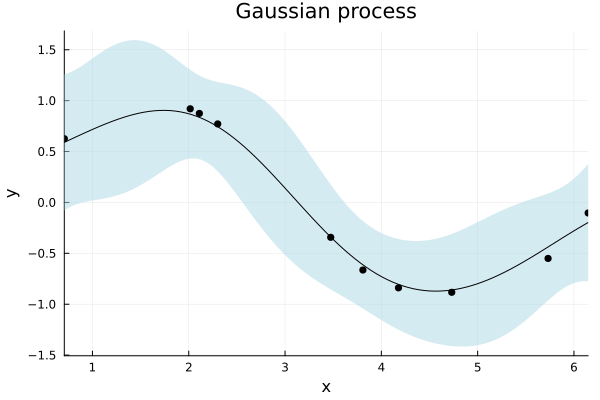

In [5]:
using Plots  #Load Plots.jl package

plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)  

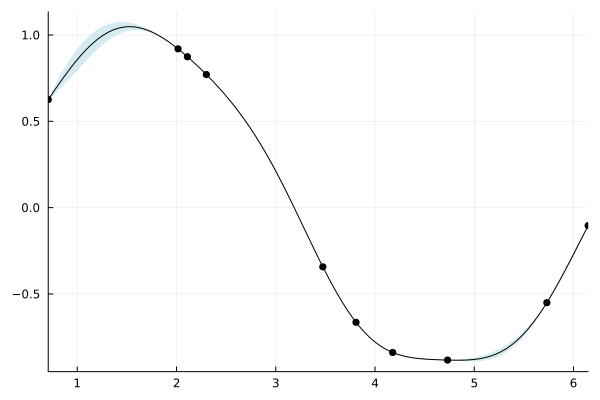

In [8]:
# using Pkg
# Pkg.add("Optim")
using Optim
optimize!(gp; method=ConjugateGradient())   # Optimise the hyperparameters
plot(gp; legend=false, fmt=:png)   #Plot the GP after the hyperparameters have been optimised 

In [24]:
#Training data
d, n = 2, 50;         #Dimension and number of observations
x = 2π * rand(d, n);                               #Predictors
y = vec(sin.(x[1,:]).*sin.(x[2,:])) + 0.05*rand(n);  #Responses
println(size(y))

(50,)


In [10]:
mZero = MeanZero()                             # Zero mean function
kern = Matern(5/2,[0.0,0.0],0.0) + SE(0.0,0.0)    # Sum kernel with Matern 5/2 ARD kernel 
                                               # with parameters [log(ℓ₁), log(ℓ₂)] = [0,0] and log(σ) = 0
                                               # and Squared Exponential Iso kernel with
                                               # parameters log(ℓ) = 0 and log(σ) = 0

Type: SumKernel{Mat52Ard{Float64}, SEIso{Float64}}
  Type: Mat52Ard{Float64}, Params: [-0.0, -0.0, 0.0]  Type: SEIso{Float64}, Params: [0.0, 0.0]

In [11]:
gp = GP(x,y,mZero,kern,-2.0)          # Fit the GP

GP Exact object:
  Dim = 2
  Number of observations = 50
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SumKernel{Mat52Ard{Float64}, SEIso{Float64}}
      Type: Mat52Ard{Float64}, Params: [-0.0, -0.0, 0.0]      Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[2.4314813881149684 0.20085833622366311 … 1.156342021760847 5.039900006994233; 5.039003930881422 1.1195695829408707 … 1.7005324247212994 3.076520616605453]
  Output observations = [-0.6083065549188683, 0.21021733434663728, -0.4728596003433228, 0.8266181740786528, -0.27835973490536137, 0.04721055210356112, -0.9748601580558843, -0.1452538433412325, -0.6644047146766565, 0.3827653812880868  …  -0.04146814888614802, -0.5374733108670069, -0.6179236078433071, -0.6148225974164132, 0.14817247905029884, 0.19852198937724883, 0.7594824335338076, 0.8819350408957468, 0.9393656283195179, -0.046279399459078385]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -28.765

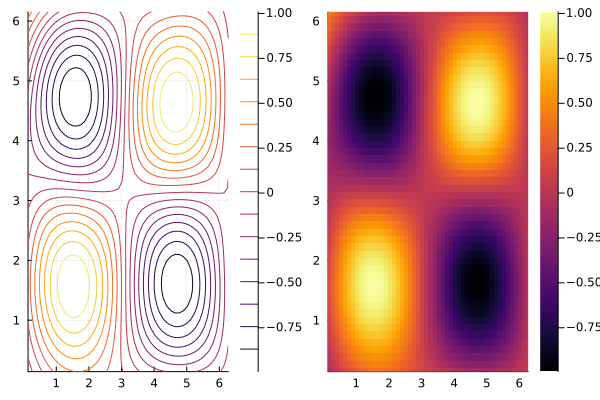

In [13]:
optimize!(gp)                         # Optimize the hyperparameters
plot(contour(gp) ,heatmap(gp); fmt=:png)

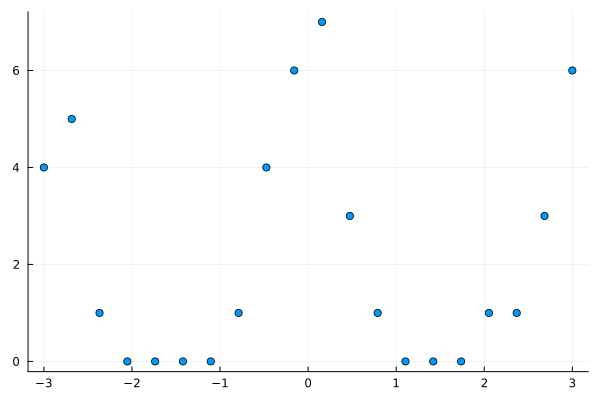

In [ ]:
#Load the package
using GaussianProcesses, Random, Distributions

#Simulate the data
Random.seed!(203617)
n = 20
X = collect(range(-3,stop=3,length=n));
f = 2*cos.(2*X);
Y = [rand(Poisson(exp.(f[i]))) for i in 1:n];

#Plot the data using the Plots.jl package with the GR backend
using Plots
gr()
scatter(X,Y,leg=false, fmt=:png)

In [15]:
#GP set-up
k = Matern(3/2,0.0,0.0)   # Matern 3/2 kernel
l = PoisLik()             # Poisson likelihood
gpmc = GP(X, vec(Y), MeanZero(), k, l)
gpvi = GP(X, vec(Y), MeanZero(), k, l)

GP Approximate object:
  Dim = 1
  Number of observations = 20
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: Mat32Iso{Float64}, Params: [0.0, 0.0]
  Likelihood:
    Type: PoisLik, Params: Any[]
  Input observations = 
[-3.0 -2.6842105263157894 … 2.6842105263157894 3.0]
  Output observations = [4, 5, 1, 0, 0, 0, 0, 1, 4, 6, 7, 3, 1, 0, 0, 0, 1, 1, 3, 6]
  Log-posterior = -74.79

In [16]:
set_priors!(gpmc.kernel,[Normal(-2.0,4.0),Normal(-2.0,4.0)])
@time samples = mcmc(gpmc; nIter=10000);

Number of iterations = 10000, Thinning = 1, Burn-in = 1 
Step size = 0.100000, Average number of leapfrog steps = 10.022100 
Number of function calls: 100222
Acceptance rate: 0.616000 
  2.010555 seconds (11.97 M allocations: 1.175 GiB, 9.34% gc time, 38.49% compilation time)


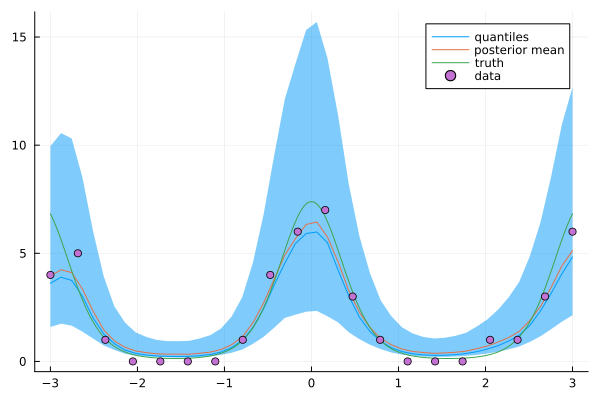

In [17]:
#Sample predicted values
xtest = range(minimum(gpmc.x),stop=maximum(gpmc.x),length=50);
ymean = [];
fsamples = Array{Float64}(undef,size(samples,2), length(xtest));
for i in 1:size(samples,2)
    set_params!(gpmc,samples[:,i])
    update_target!(gpmc)
    push!(ymean, predict_y(gpmc,xtest)[1])
    fsamples[i,:] = rand(gpmc, xtest)
end

#Predictive plots

q10 = [quantile(fsamples[:,i], 0.1) for i in 1:length(xtest)]
q50 = [quantile(fsamples[:,i], 0.5) for i in 1:length(xtest)]
q90 = [quantile(fsamples[:,i], 0.9) for i in 1:length(xtest)]
plot(xtest,exp.(q50),ribbon=(exp.(q10), exp.(q90)),leg=true, fmt=:png, label="quantiles")
plot!(xtest,mean(ymean), label="posterior mean")
xx = range(-3,stop=3,length=1000);
f_xx = 2*cos.(2*xx);
plot!(xx, exp.(f_xx), label="truth")
scatter!(X,Y, label="data")

In [25]:
function Wavelength(E)
    hc = 12.398 #keV*Angstrom
    # h = 6.582119e-16 #eV*sec
    # mc2 = 511 #keV
    E₀ = 511.0 #keV
    return hc/sqrt(abs(E*(2*E₀ + E)))
end

function Focus(E, Cs, nᵢ=1)
    return sqrt((2*nᵢ-0.5)*Cs*Wavelength(E))
end
kmax(E, Cs) = (6/((abs(Cs)*Wavelength(E)^3)))^(1/4)
E = 300.0 #keV
Cs = 1 #mm
Cs = Cs * 1e7 #convert to Angstroms
λ_const = Wavelength(E)

N = 2^6
physical_scale = 1
camera_scale = 2

upper = (N-1)/2 + 0.1
lower = (-N+1)/2
kx = lower:1:upper
ky = lower:1:upper

k = @. sqrt(kx'^2 + ky^2)
disk = k.<=N/2
disk = Float64.(disk)

kx = kx./maximum(kx).*kmax(E, Cs)
ky = ky./maximum(ky).*kmax(E, Cs)
k = @. sqrt(kx'^2 + ky^2)


Δk = kx[2] - kx[1]
L = 1/Δk
ΔL = L/N

x = LinRange(-L/2, L/2, N)
y = LinRange(-L/2, L/2, N)
gauss(x, y, xc, yc, σ₁, σ₂) = @. (1/((2*pi)*sqrt(σ₁*σ₂)))*exp(-(x - xc)^2/(2σ₁^2) -(y - yc)^2/(2σ₂^2) )

gauss (generic function with 1 method)

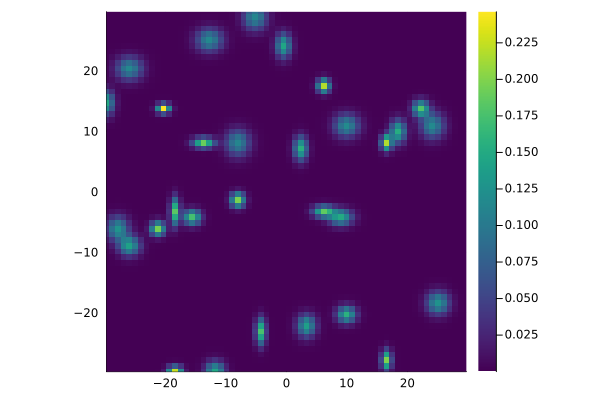

In [40]:
phase = zeros(N, N)


θ_rot = deg2rad(0)
rotatedx = @. cos(θ_rot)*x' + sin(θ_rot)*y
rotatedy = @. -sin(θ_rot)*x' + cos(θ_rot)*y
Random.seed!(1)
phase_real = zeros(N, N)
phase_complex = zeros(N, N)
for i in 1:30
    xc = rand(x)
    yc = rand(y)
    σx, σy = rand(Uniform(0.5, 1.5)), rand(Uniform(0.5, 1.5))
    phase += gauss(rotatedx,rotatedy, xc, yc, σx, σy)

end



fig1 = heatmap(x,y,phase, aspect_ratio=1, c=:viridis, colorbar=true, axis=true)
# xlabel!(L"x\, (Å)")
# ylabel!(L"y\, (Å)")
xlims!(-L/2, L/2)
ylims!(-L/2, L/2)
# title!("angle of tramission function \n (π Gaussians)")

(2, 4096)
4096


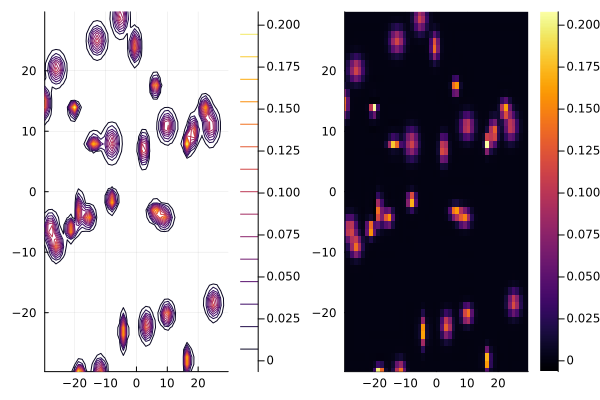

In [ ]:
#Training data
d, n = 2, 64^2;         #Dimension and number of observations
X = hcat(vec(repeat(x, inner=length(y))), vec(repeat(y, outer=length(x))))
X = X'
y_2_fit = vec(phase)

println(size(X))    # should output (4096, 2)
println(length(y_2_fit))  # should output 4096


mZero = MeanZero()                             # Zero mean function
kern = Matern(5/2,[0.0,0.0],0.0) + SE(0.0,0.0)    # Sum kernel with Matern 5/2 ARD kernel 
                                               # with parameters [log(ℓ₁), log(ℓ₂)] = [0,0] and log(σ) = 0
                                               # and Squared Exponential Iso kernel with
                                               # parameters log(ℓ) = 0 and log(σ) = 0
gp = GP(X,y_2_fit,mZero,kern,-2.0)          # Fit the GP
optimize!(gp)                         # Optimize the hyperparameters


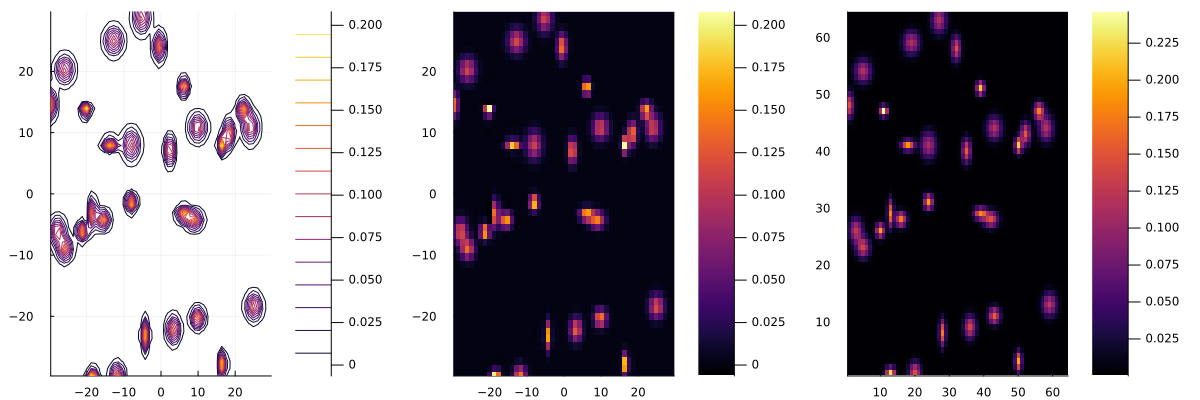

In [34]:
plot(contour(gp) ,heatmap(gp), heatmap(phase), layout=(1,3), size=(1200,400))

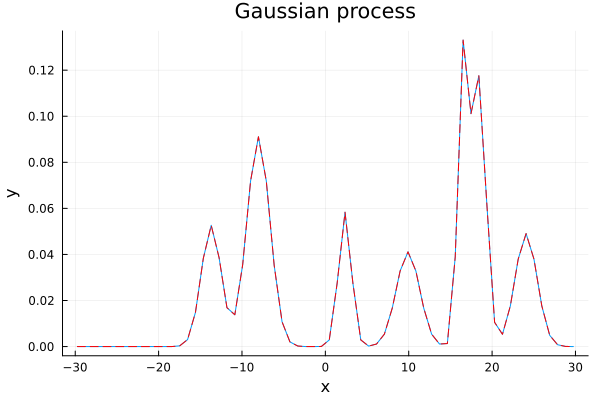

In [39]:
# Assume N = 64 (from your code)
# Assume N = 64 (from your code)
row_idx = (N ÷ 2) + 10      # for example, 42 if N=64
y_val = y[row_idx]          # corresponding y coordinate

# Create test inputs: they should be 2 x (# test points)
test_x = collect(x)                         # x is a 1-d array of length 64
test_points = hcat(test_x, fill(y_val, length(test_x)))'
# Now test_points has dimensions (2, 64)

# Predict using your GP model
mean_pred, σ²_pred = predict_y(gp, test_points)

# Plot the original phase row vs. test_x
using Plots
plot(test_x, phase[row_idx, :], label="phase", title="phase", xlabel="x", ylabel="phase")
plot!(test_x, mean_pred; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png, linestyle=:dash, color=:red)